In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The code are written by C++ and plot by Python.

# Question 1
Assume that the value of a collateral follows a jump-diffusion process: 𝑑𝑉𝑡/𝑉𝑡− = 𝜇𝑑𝑡 + 𝜎𝑑𝑊𝑡 + 𝛾𝑑𝐽𝑡 where 𝜇, 𝜎, 𝛾 < 0, and 𝑉0 are given, 𝐽 is a Poisson process, with intensity 𝜆1, independent of the Brownian Motion process 𝑊. 𝑉𝑡− is the value process before jump occurs at time t (if any). Consider a collateralized loan, with a contract rate per period r and maturity T on the above-collateral, and assume the outstanding balance of that loan follows this process: 𝐿𝑡 = 𝑎 − 𝑏𝑐^{12𝑡} where 𝑎 > 0, 𝑏 > 0 , 𝑐 > 1, 𝑎𝑛𝑑 𝐿0 are given. We have that 𝐿_𝑇 = 0. Define the following stopping time: 𝜏 = 𝑚𝑖𝑛{𝑡 ≥ 0: 𝑉𝑡 ≤ 𝑞_𝑡𝐿_𝑡} Here, 𝑞𝑡 is a known function of time. This stopping time is the first time when the relative value of the collateral (with respect to the outstanding loan balance) crosses a threshold, which will be viewed as the “optimal exercise boundary” of the option to default. We assume the embedded default option will be exercised at time 𝜏, if and only if 𝜏 ≤ 𝑇. If the default option is exercised at time 𝜏 then the “payoff” to the borrower is: (𝐿𝜏 − 𝜖𝑉𝜏)+.

Write the code as a function Proj3_2func.* that takes 𝜆1 and T as parameters, setting defaults if these parameters are not supplied, and outputs the default option value, the default probability, and the expected default option exercise time. Function specification: function [D, Prob, Et] = Proj3_2func(lambda1, T)

In [ ]:
// Define a function to model and simulate a project finance scenario using a Monte Carlo approach
VectorXd Proj3_2(float lambda1 = 0.2, float T = 5, float V0 = 20000, float L0 = 22000, float mu = -0.1, float sigma = 0.2, float gamma = -0.4, float r0 = 0.055, float delta = 0.25, float lambda2 = 0.4, float alpha = 0.7, float epsilon = 0.95, int N1 = 10000, int N2 = 10000)
{
    // Calculating terms for loan payment, risk assessment and default threshold
    float R = r0 + delta * lambda2, r = R / 12.0, n = T * 12, PMT = (L0*r)/(1-1/pow(1+r,n));
    float a = PMT/r, b = PMT/(r*pow(1+r,n)), c = 1+r;
    float beta = (epsilon - alpha)/T;
    float D = 0, Prob = 0, Et = 0;
    float Vt, qt, Lt, dt = T/N2, t;
    exponential_distribution<> exp_dis(lambda1);
    default_random_engine gen;
    normal_distribution<float> dis(0, 1);
    
    // Monte Carlo simulation for N1 trials
    for(int i = 0; i < N1; i++)
    {
        t = 0;
        Vt = V0;
        int j = 1;
        // Loop over the simulation time period
        while(t < T) {
            double jumpTime = exp_dis(gen); // Time until the next jump
            // Process the asset value between jumps
            while (t + jumpTime < T && t + jumpTime <= dt * j) {
                Vt *= exp(mu * jumpTime + sigma * sqrt(jumpTime) * dis(gen));
                Vt *= (1 + gamma);
                t += jumpTime;
                jumpTime = exp_dis(gen);
            }
            double interval = min(dt, T - t);
            Vt *= exp(mu * interval + sigma * sqrt(interval) * dis(gen));
            t += interval;
            Lt = a - b * pow(c,12*t);
            qt = alpha + beta * t;
            // Check for default condition
            if(Vt <= qt * Lt) {
                Prob += 1;
                Et += t;
                D += exp(-r * t) * max(Lt - epsilon * Vt, 0.0);
                break;
            }
            j++;
        }
    }
    // Calculate expected time to default, loss given default, and default probability
    Et /= Prob;
    D /= N1;
    Prob /= N1;
    VectorXd results(3);
    results << D, Prob, Et;
    return results;
}

// Helper function to print Eigen vectors as Python-style lists
void printAsPythonList(const VectorXd& vec) {
    cout << "[";
    for (int i = 0; i < vec.size(); ++i) {
        cout << vec[i];
        if (i < vec.size() - 1) {
            cout << ", ";
        }
    }
    cout << "]" << endl;
}

In [ ]:
for(float lambda = 0.05; lambda <= 0.4; lambda = lambda + 0.05)
    {
        for(float T = 3; T <= 8; T = T + 1)
        {
            printAsPythonList(Proj3_2(lambda, T));
            cout << ", ";
        }
    }

(a) Estimate the value of the default option for the following ranges of parameters: 𝜆1 from 0.05 to 0.4 in increments of 0.05; T from 3 to 8 in increments of 1;

In [4]:
import pandas as pd
results = pd.DataFrame([[948.311, 0.1624, 0.706299]
, [1807.05, 0.3178, 0.919515]
, [2747.84, 0.4796, 1.1082]
, [3404.44, 0.5904, 1.28809]
, [4138.57, 0.7032, 1.44002]
, [4667.13, 0.776, 1.52378]
, [1447.09, 0.2408, 0.742851]
, [2357.7, 0.3914, 0.94578]
, [3257.22, 0.5422, 1.12599]
, [3952.46, 0.6532, 1.28355]
, [4679.09, 0.7554, 1.39669]
, [5044.35, 0.8078, 1.55127]
, [1758.87, 0.2776, 0.740807]
, [2684.88, 0.4356, 0.953536]
, [3692.27, 0.596, 1.12929]
, [4495.44, 0.7102, 1.28855]
, [5141.91, 0.7882, 1.35912]
, [5537.81, 0.8514, 1.52]
, [2052.61, 0.3214, 0.735337]
, [3191.55, 0.5026, 0.957243]
, [4091.22, 0.6356, 1.1351]
, [4950.57, 0.7592, 1.27398]
, [5547.41, 0.8302, 1.35989]
, [5948.21, 0.8782, 1.48374]
, [2488.79, 0.3798, 0.721908]
, [3554.74, 0.5482, 0.948169]
, [4496.55, 0.6808, 1.10951]
, [5239.99, 0.7828, 1.24261]
, [5950.76, 0.8586, 1.30096]
, [6338.7, 0.906, 1.40752]
, [2837.04, 0.4274, 0.727004]
, [3968.71, 0.593, 0.918589]
, [4885.7, 0.7202, 1.06754]
, [5659.91, 0.8236, 1.18977]
, [6260.99, 0.8832, 1.26332]
, [6644.08, 0.9248, 1.35875]
, [3068.48, 0.4576, 0.718377]
, [4212.73, 0.623, 0.928051]
, [5259.45, 0.7628, 1.06063]
, [5981.99, 0.8508, 1.1778]
, [6620.17, 0.9104, 1.23461]
, [6905.17, 0.9416, 1.32745]
, [3491.48, 0.5076, 0.697366]
, [4581.16, 0.663, 0.894003]
, [5616.47, 0.791, 1.04145]
, [6322.43, 0.875, 1.15413]
, [6739.87, 0.914, 1.22173]
, [7118.92, 0.9522, 1.25838]], columns=['option_price','default_prob','exercise_time'])
results

,option_price,default_prob,exercise_time
0,948.311,0.1624,0.706299
1,1807.050,0.3178,0.919515
2,2747.840,0.4796,1.108200
3,3404.440,0.5904,1.288090
4,4138.570,0.7032,1.440020
5,4667.130,0.7760,1.523780
6,1447.090,0.2408,0.742851
7,2357.700,0.3914,0.945780
8,3257.220,0.5422,1.125990
9,3952.460,0.6532,1.283550


(b) Estimate the default probability for the following ranges of parameters: 𝜆1 from 0.05 to 0.4 in increments of 0.05; T from 3 to 8 in increments of 1;

(c) Find the Expected option Exercise Time of the default option, conditional on 𝜏 < 𝑇. That is, estimate 𝐸(𝜏 | 𝜏 < 𝑇) for the following ranges of parameters: 𝜆1 from 0.05 to 0.4 in increments of 0.05; T from 3 to 8 in increments of 1

### Write_up Q1:

When lambda 1 = 0.2 and T = 5, the expected option value is 4254.27, default probability is 0.6654, expected exercise time is 1.13553.

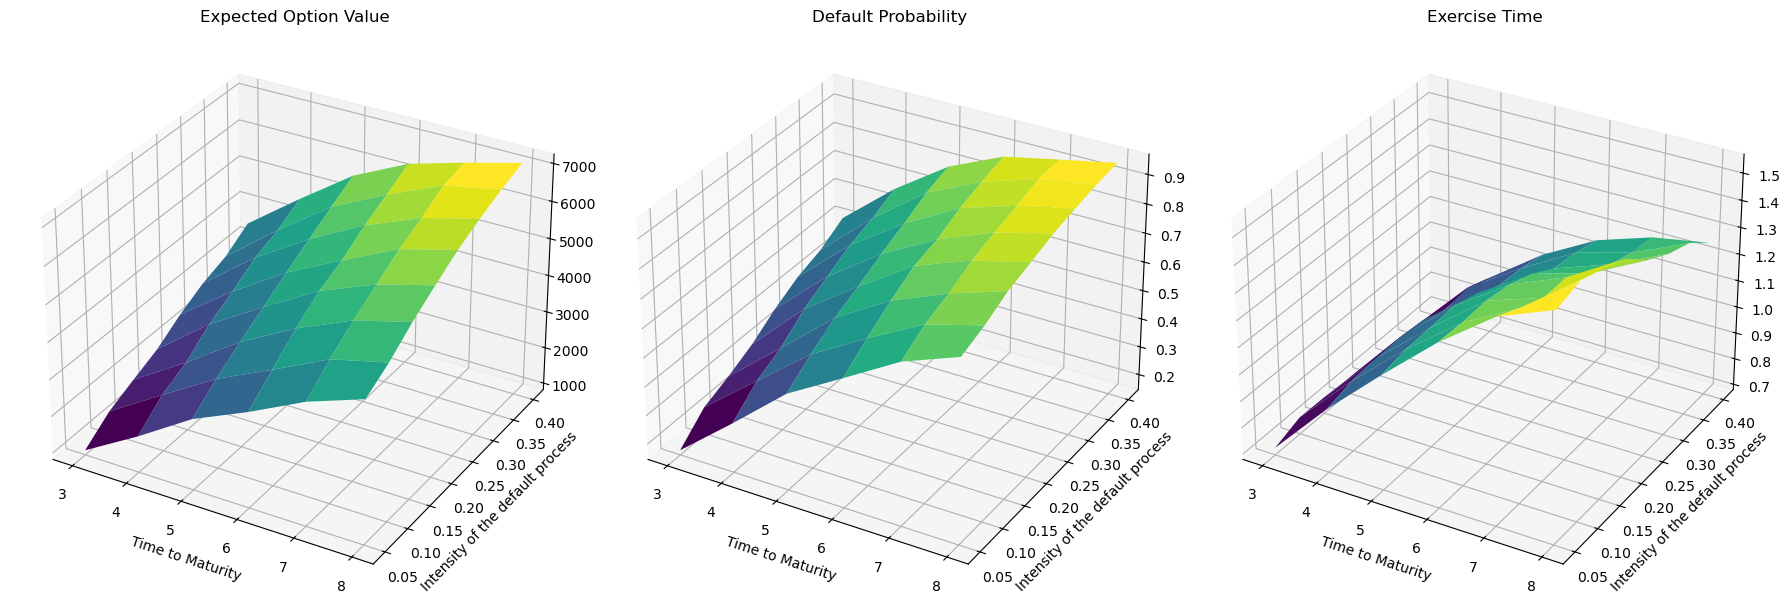

In [12]:
# Plot 3-D surface plots
fig, ax = plt.subplots(1, 3, figsize=(18, 6), subplot_kw={"projection": "3d"})
X, Y = np.meshgrid(np.arange(3,9), np.arange(0.05,0.45,0.05))

# Expected option value
ax[0].plot_surface(X, Y, results['option_price'].values.reshape((8, 6)), cmap='viridis')
ax[0].set_title('Expected Option Value')
ax[0].set_xlabel('Time to Maturity')
ax[0].set_ylabel('Intensity of the default process')

# Default probability
ax[1].plot_surface(X, Y, results['default_prob'].values.reshape((8, 6)), cmap='viridis')
ax[1].set_title('Default Probability')
ax[1].set_xlabel('Time to Maturity')
ax[1].set_ylabel('Intensity of the default process')

# Expected exercise time
ax[2].plot_surface(X, Y, results['exercise_time'].values.reshape((8, 6)), cmap='viridis')
ax[2].set_title('Exercise Time')
ax[2].set_xlabel('Time to Maturity')
ax[2].set_ylabel('Intensity of the default process')

plt.tight_layout()
plt.show()

# Question 2
Consider the following 2-factor model for a stock price process, under the risk-neutral measure: {𝑑𝑆𝑡 = 𝑟𝑆𝑡𝑑𝑡 + √𝑣𝑡 𝑆𝑡 𝑑𝑊𝑡, 𝑑𝑣𝑡 = (𝛼 + 𝛽𝑣𝑡)𝑑𝑡 + 𝛾√𝑣𝑡 𝑑𝐵𝑡} where 𝑊𝑡 and 𝐵𝑡 are correlated Brownian Motion processes with 𝑑𝑊𝑡𝑑𝐵𝑡 = 𝜌𝑑𝑡. Default parameter values: 𝑣0 = 0.1, 𝛼 = 0.45, 𝛽 = −5.105, 𝛾 = 0.25, 𝑆0 = $100, 𝑟 = 0.05, 𝜌 = −0.75, 𝐾 = $100, 𝑇 = 1.

(a) Estimate the Price (𝑃1) of a Down-and-Out Put option with the barrier at 𝑆_𝑏^1(𝑡) = 94.

In [ ]:
// Define a constant barrier function for the Down-and-Out Put option.
float Sb1(float t, float T) {
    // This function returns a constant barrier of 94 regardless of time.
    return 94;
}

// Function to estimate the price of a Down-and-Out Put option using Monte Carlo simulation.
float DOP(float(*Sb)(float,float), float V0 = 0.1, float alpha = 0.45, float beta = -5.105, float gamma = 0.25, float S0 = 100, float r = 0.05, float rho = -0.75, float K = 100, float T = 1, int N1 = 1000, int N2 = 1000) {
    float St, Vt, dt = T / N2, dW, dB, t, flag, P_do = 0;
    default_random_engine gen;
    normal_distribution<float> dis(0, 1);

    // Run N1 simulations for the option pricing.
    for (int i = 0; i < N1; i++) {
        St = S0; // Start stock price
        Vt = V0; // Start volatility
        t = 0;
        flag = 1; // Flag to check if the option is still active (not knocked out)

        // Time stepping through the option's life
        for (int j = 0; j <= N2; j++) {
            t += dt;
            dW = sqrt(dt) * dis(gen); // Random walk component for stock
            dB = rho * dW + sqrt(1 - pow(rho, 2.0)) * sqrt(dt) * dis(gen); // Random walk for volatility

            // Update stock and volatility using stochastic differential equations
            St += r * St * dt + sqrt(max(Vt, 0)) * St * dW;
            Vt += (alpha + beta * max(Vt, 0)) * dt + gamma * sqrt(max(Vt, 0)) * dB;

            // Check if the barrier is breached
            if (St <= Sb(t, T)) {
                flag = 0;
                break;
            }
        }

        // If not knocked out, calculate payoff
        if (flag == 1) {
            P_do += max(K - St, 0.0f);
        }
    }

    // Average the payoff and discount back to present value
    P_do *= exp(-r * T) / N1;
    return P_do;
}

(b) Estimate the Price (𝑃2) of a Down-and-Out Put option with time-dependent barrier 𝑆_𝑏^2(𝑡) = 6t/𝑇 + 91.

In [ ]:
// Barrier function with a linearly increasing profile over time.
float Sb2(float t, float T) {
    // Linearly increases with time from 91 to 97 over the period T
    return 6 * t / T + 91;
}

(c) Estimate the Price (𝑃3) of a Down-and-Out Put option with time-dependent barrier 𝑆_𝑏^3(𝑡) = − 6t/𝑇 + 97.

In [ ]:
// Barrier function with a linearly decreasing profile over time.
float Sb3(float t, float T) {
    // Linearly decreases with time from 97 to 91 over the period T
    return -6 * t / T + 97;
}

### Write_up Q2:
* $P_1=0.0103521, P_2=0.00132061, P_3=0.0128169$
* Barrier Levels and Risk: The level and dynamics of the barrier have a significant impact on the pricing of barrier options. A lower barrier increases the risk of the option being knocked out, thus lowering its price. Conversely, a barrier that becomes increasingly difficult to reach (i.e., moving away from the stock price) lowers the risk of knockout, reducing the option's premium.
* Impact of Volatility and Correlation: The model parameters for volatility dynamics and the correlation between the stock price and its volatility significantly affect the likelihood of hitting the barrier. Higher volatility and negative correlation ($\rho=−0.75$) between stock price movement and volatility increase the chances of breaching a barrier, particularly when the barrier is close to the stock price or moving towards it.


# Question 3
Assume the dynamics of the short-term interest rate, under the risk-neutral measure, are given by the following SDE (CIR model): 𝑑𝑟𝑡 = 𝜅(𝑟̅ − 𝑟𝑡)𝑑𝑡 + 𝜎√𝑟𝑡𝑑𝑊𝑡 with 𝑟0 = 5%, 𝜎 = 12%, 𝜅 = 0.92, 𝑟̅ = 5.5%.

(a) Use Monte Carlo Simulation to find the price of a coupon-paying bond, with Face Value of $\$1,000$, paying semiannual coupons of $\$30$, maturing in $𝑇 = 4$ years: $𝑃(0, 𝐶, 𝑇) = 𝔼_0^∗[∑_𝑖=1^8 𝐶_𝑖 ∗ 𝑒𝑥𝑝 (− ∫_0^Ti 𝑟(𝑠)𝑑𝑠 )]$ where $𝐶 = {𝐶_𝑖 = \$30 for 𝑖 = 1,2, ... ,7;}$ and $𝐶_8 = \$1030$, and $𝑇 = {𝑇_1, 𝑇_2, 𝑇_3, 𝑇_4, 𝑇_5, 𝑇_6, 𝑇_7, 𝑇_8}= {0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4}$.

In [ ]:
// Simulate interest rates using the Cox-Ingersoll-Ross (CIR) model
MatrixXd CIR_simulate(float r0, float sigma, float k, float r_bar, float T, float dt, int N) {
    int n = int(T / dt);
    MatrixXd r(N, n);
    default_random_engine gen;
    normal_distribution<float> dis(0, 1);
    float dW;
    r.col(0) = VectorXd::Constant(N, r0);  // Initialize the first column with the initial rate r0
    
    // Simulate the rate paths
    for (int i = 0; i < N; i++) {
        for (int j = 1; j < n; j++) {
            dW = sqrt(dt) * dis(gen);  // Generate a random shock
            // Update the rate using the CIR model differential equation
            r(i, j) = r(i, j-1) + k * (r_bar - r(i, j-1)) * dt + sigma * sqrt(max(r(i, j-1), 0.0f)) * dW;
        }
    }
    return r;
}

// Calculate the price of a coupon bond under the CIR model
float CIR_Coupon_Bond(float face_value, float coupon, float r0, float sigma, float k, float r_bar, float T, float dt, list<float> T_list, int N = 1000) {
    MatrixXd r = CIR_simulate(r0, sigma, k, r_bar, T, dt, N);
    float price = 0;

    // Compute the price by discounting the coupon payments and the face value
    for (float t : T_list) {
        MatrixXd rt = r.block(0, 0, N, int(t / dt));
        price += coupon * (-rt.rowwise().sum() * dt).array().exp().mean();  // Discounting coupon payments
        if (t == T_list.back()) {
            price += face_value * (-rt.rowwise().sum() * dt).array().exp().mean();  // Discounting the face value
        }
    }
    return price;
}

(b) Use Monte Carlo Simulation to find at time 𝑡 = 0 the price 𝑐𝑀𝐶(𝑡, 𝑇, 𝑆) of a European Call option, with strike price of 𝐾 = $\$980$ and expiration in 𝑇 = 0.5 years on a Pure Discount Bond that has Face Value of $\$1,000$ and matures in 𝑆 = 1 year: 𝑐_{𝑀𝐶}(𝑡, 𝑇, 𝑆) = 𝔼_𝑡^∗[𝑒𝑥𝑝 (− ∫_t^T 𝑟(𝑢)𝑑𝑢) ∗ max(𝑃(𝑇, 𝑆) − 𝐾, 0)]

In [ ]:
// Monte Carlo Simulation to find the price of a European Call option on a Pure Discount Bond
float CMC_Bond(float face_value, float K, float T, float S, float r0, float sigma, float k, float r_bar, float dt, int N = 1000, int M = 1000) {
    MatrixXd r1 = CIR_simulate(r0, sigma, k, r_bar, T, dt, N);
    float price = 0;

    // Simulate the option price
    for (int i = 0; i < N; i++) {
        MatrixXd r2 = CIR_simulate(r1(i, int(T / dt) - 1), sigma, k, r_bar, S - T, dt, M);
        price += exp(-r1.row(i).sum() * dt) * max(face_value * (-r2.rowwise().sum() * dt).array().exp().mean() - K, 0.0);
    }
    return price / N;
}

(c) Use the Implicit Finite-Difference Method to find at time 𝑡 = 0 the price 𝑐𝑃𝐷𝐸(𝑡, 𝑇, 𝑆) of a European Call option, with strike price of 𝐾 = $\$980$ and expiration in 𝑇 = 0.5 years on a Pure Discount Bond that has Face Value of $\$1,000$ and matures in 𝑆 = 1 year. The PDE is given as follows 𝜕𝑐/𝜕𝑡 + 1/2 𝜎2𝑟 𝜕2𝑐/𝜕𝑟2 + 𝜅(𝑟̅ − 𝑟) 𝜕𝑐/𝜕𝑟 − 𝑟𝑐 = 0 with 𝑐(𝑇, 𝑇, 𝑆) = max(𝑃(𝑇, 𝑆) − 𝐾, 0), and 𝑃(𝑇, 𝑆) is computed explicitly.

In [ ]:
// Function to calculate the price of a pure discount bond using the CIR model
float pure_bond(float k, float sigma, float r_bar, float t, float S, float rt) {
    float h1, h2, h3, A, B;
    // Calculate parameters for the analytic solution
    h1 = sqrt(pow(k, 2) + 2 * pow(sigma, 2));  // h1 is a helper coefficient in the formula, dependent on the mean reversion speed k and volatility sigma
    h2 = (k + h1) / 2;  // h2 modifies the mean reversion speed by incorporating the effect of h1
    h3 = 2 * k * r_bar / pow(sigma, 2);  // h3 represents the long-term mean level adjusted by the volatility

    // A and B are components of the formula to compute the bond price analytically
    A = pow((h1 * exp(h2 * (S - t))) / (h2 * (exp(h1 * (S - t)) - 1) + h1), h3);  // A calculates the discounting factor
    B = (exp(h1 * (S - t)) - 1) / (h2 * (exp(h1 * (S - t)) - 1) + h1);  // B is a discounting factor multiplier that adjusts for the change in rates over time

    // The price of the bond is then calculated using the exponential of the negative product of B and the current interest rate (rt)
    return A * exp(-B * rt);
}

// Implicit Finite-Difference Method to price a European Call option
VectorXd IFD_Bond(float face_value, float K, float T, float S, float r0, float sigma, float k, float r_bar, int N = 200, int M = 1000) {
    float dr = 3 * r0 / M, dt = T / N;
    MatrixXd Pumd(N+1, 3), A(N-1, N-1);
    VectorXd C(N-1), B(N-1);

    // Setup the coefficients for the finite difference matrix
    for (int i = 1; i <= N; i++) {
        Pumd.row(i) << dt * (-pow(sigma/dr, 2) * i / 2 + k * (i * dr - r_bar) / (2 * dr)),
                       1 + pow(sigma, 2) * i * dt / dr + i * dr * dt,
                       dt * (-pow(sigma/dr, 2) * i / 2 - k * (i * dr - r_bar) / (2 * dr));

        if (i == 1) {
            A.row(N-2).segment(N-3, 2) = Pumd.row(1).segment(0, 2);
        } else if (i == N-1) {
            A.row(0).segment(0, 2) = Pumd.row(N-1).segment(1, 2);
        } else if (i == N) {
            break;
        } else {
            A.row(N-i-1).segment(N-i-2, 3) = Pumd.row(i);
        }
    }

    // Set boundary conditions for the option at maturity
    for (int i = 1; i <= N-1; i++) {
        C(i-1) = max(face_value * pure_bond(k, sigma, r_bar, T, S, (N-i) * dr) - K, 0.0);
    }

    // Solve the system using LU decomposition to find the option price at t=0
    for (int i = M-1; i >= 0; i--) {
        B(N-2) = Pumd(N, 2) * (face_value * pure_bond(k, sigma, r_bar, i * dt, S, (N-1) * dr) - K);
        C = A.lu().solve(C - B);
    }
    return C;
}

### Write_up Q3:
* The coupon bond price = 1021.31
* The European call option price by Monte Carlo simulation = 0.437993
* The European call option price by PDE = 0.3935
* Monte Carlo Simulation uses random sampling to estimate the solution of a mathematical equation or problem. It is particularly useful in the context of option pricing under stochastic processes where exact analytical solutions may not be available or are complex to derive. The result of $C_{MC} = 0.437993$ indicates the expected price based on a large number of simulated paths for the underlying bond price and interest rates. This method tends to have a higher variance, especially with fewer simulation paths, leading potentially to a higher price estimate due to averaging out many scenarios.
* Implicit Finite-Difference Method solves the Partial Differential Equation (PDE) associated with the option's value. It typically provides a more stable and accurate solution as it discretizes the problem and solves it iteratively across a grid that represents different states of the underlying variables (in this case, interest rates). The result of $C_{PDE} = 0.3935$ reflects a potentially more "smoothed" estimation, emphasizing the averages over extreme values less than Monte Carlo might.
* The difference in pricing between $C_{MC}$ and $C_{PDE}$ might suggest several things:
    * Model Calibration and Parameters: The slight discrepancy between the results could be due to different numerical settings like grid density in the PDE method or the number of paths and timestep size in the Monte Carlo simulation.
    * Error Estimation and Reduction: It is crucial in practice to perform error analysis on both methods to understand the confidence level of the results. For critical financial decisions, averaging results from multiple methods or increasing simulation paths and refining grid resolution can be beneficial.

# Question 4
Assume the dynamics of the short-term interest rate, under the risk-neutral measure, are given by the following system of SDEs (G2++ model): 𝑑𝑥𝑡 = −𝑎𝑥𝑡𝑑𝑡 + 𝜎𝑑𝑊𝑡, 𝑑𝑦𝑡 = −𝑏𝑦𝑡𝑑𝑡 + 𝜂𝑑𝑊𝑡2, 𝑟𝑡 = 𝑥𝑡 + 𝑦𝑡 + 𝜙𝑡, Default parameter values: 𝑥0 = 𝑦0 = 0, 𝜙0 = 𝑟0 = 5.5%, 𝑑𝑊𝑡1𝑑𝑊𝑡2 = 𝜌𝑑𝑡, 𝜌 = 0.7, 𝑎 = 0.1, 𝑏 = 0.3, 𝜎 =5%, 𝜂 = 9%. Assume 𝜙𝑡 = 𝑐𝑜𝑛𝑠𝑡 = 5.5% for any 𝑡 ≥ 0. Use Monte Carlo Simulation to find at time 𝑡 = 0 the price 𝑝(𝑡, 𝑇, 𝑆, 𝐾, 𝜌) of a European Put option, with strike price of 𝐾 = $\$950$, expiration in 𝑇 = 0.5 years on a Pure Discount Bond with Face value of $\$1,000$ that matures in 𝑆 = 1 year. Compare it with the price found by the explicit formula and comment on it.

In [ ]:
// Function to simulate the G2++ model for interest rates over a time period T
MatrixXd simulate_G2(float a, float b, float r0, float rho, float sigma, float eta, float phi, float T, float dt, int N, VectorXd& x0, VectorXd& y0) {
    float x, y, w1, w2;
    int M = int(T / dt);  // Number of time steps
    MatrixXd r(N, M + 1);  // Matrix to store simulated interest rates
    default_random_engine gen;
    normal_distribution<float> dis(0, 1);

    // Simulate each path
    for (int i = 0; i < N; i++) {
        x = x0(i);
        y = y0(i);
        r(i, 0) = r0;  // Set initial rate
        
        // Time evolution of the rate
        for (int j = 1; j <= M; j++) {
            w1 = sqrt(dt) * dis(gen);
            w2 = rho * w1 + sqrt(1 - pow(rho, 2)) * sqrt(dt) * dis(gen);
            x += -a * x * dt + sigma * w1;
            y += -b * y * dt + eta * w2;
            r(i, j) = x + y + phi;  // Calculate the rate at each step
        }
        x0(i) = x;  // Update last values for continuation
        y0(i) = y;
    }
    return r;
}

// Monte Carlo simulation to price a European call option on a bond
float Monte_put_G2(float a, float b, float r0, float rho, float sigma, float eta, float phi, float T, float S, float dt, float face_value, float K, int N = 1000, int M = 1000) {
    VectorXd x0 = VectorXd::Zero(N), y0 = VectorXd::Zero(N);
    MatrixXd r = simulate_G2(a, b, r0, rho, sigma, eta, phi, T, dt, N, x0, y0);
    float price = 0;

    // Price the option by averaging the discounted payoff from all simulated paths
    for (int i = 0; i < N; i++) {
        VectorXd x2 = VectorXd::Constant(M, x0(i)), y2 = VectorXd::Constant(M, y0(i));
        MatrixXd r2 = simulate_G2(a, b, r(i, int(T/dt)), rho, sigma, eta, phi, S - T, dt, M, x2, y2);
        price += exp(-r.row(i).sum() * dt) * max(face_value * (-r2.rowwise().sum() * dt).array().exp().mean() - K, 0.0);
    }
    return price / N;
}

In [ ]:
// Analytical pricing of a bond under the two-factor Gaussian model
float two_factor_price(float t, float T, float phi, float a, float b, float sigma, float eta, float rho, float xt, float yt) {
    float A, B, C, D, E, F;
    A = -phi * (T - t);  // Discount factor from the model's long-term mean adjustment
    B = -(1 - exp(-a * (T - t))) / a * xt;  // Contribution from factor x
    C = -(1 - exp(-b * (T - t))) / b * yt;  // Contribution from factor y
    D = pow(sigma, 2) / (2 * pow(a, 2)) * (T - t + 2/a * exp(-a * (T-t)) - 1/(2*a) * exp(-2 * a * (T-t)) - 3/(2*a));
    E = pow(eta, 2) / (2 * pow(b, 2)) * (T - t + 2/b * exp(-b * (T-t)) - 1/(2*b) * exp(-2 * b * (T-t)) - 3/(2*b));
    F = sigma * eta * rho / (a * b) * (T - t + (exp(-a * (T-t)) - 1) / a + (exp(-b * (T-t)) - 1) / b - (exp(-(a+b) * (T-t)) - 1) / (a+b));
    return exp(A + B + C + D + E + F);  // Total bond price
}

// Calculate the cumulative distribution function for a normal distribution
double norm_cdf(double value) {
    return 0.5 * erfc(-value * M_SQRT1_2);
}

// Explicit formula for pricing a European call option on a pure discount bond
float explicit_put_G2(float T, float S, float face_value, float K, float r0, float sigma, float eta, float a, float b, float rho, float phi) {
    float P_S = two_factor_price(0, S, phi, a, b, sigma, eta, rho, 0, 0), P_T = two_factor_price(0, T, phi, a, b, sigma, eta, rho, 0, 0);
    float Sigma = pow(sigma, 2) / (2 * pow(a, 3)) * pow((1 - exp(-a * (S-T))), 2) * (1 - exp(-2 * a * T)) + pow(eta, 2) / (2 * pow(b, 3)) * pow((1 - exp(-b * (S-T))), 2) * (1 - exp(-2 * b * T)) + 2 * sigma * eta * rho / (a * b * (a + b)) * (1 - exp(-a * (S-T))) * (1 - exp(-b * (S-T))) * (1 - exp(-(a+b) * T));
    float d1 = log(P_T * K / P_S / face_value) / sqrt(Sigma) - 0.5 * sqrt(Sigma), d2 = d1 + sqrt(Sigma);
    return -P_S * face_value * norm_cdf(d1) + P_T * K * norm_cdf(d2);  // Black-Scholes type formula
}

### Write_up Q4:
* The option price using the Monte Carlo method is 6.24693,. 
* The explicit option price is 6.17168. 

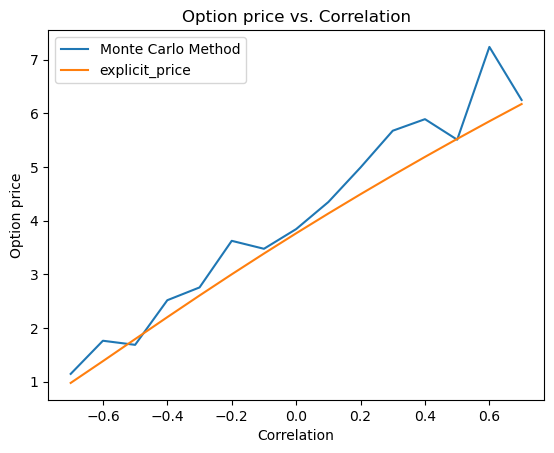

In [41]:
monte_carlo_price = [1.14697, 1.76423, 1.68795, 2.51886, 2.75674, 3.62465, 3.47647, 3.84319, 4.34704, 4.99138, 5.67482, 5.88996, 5.50746, 7.23497, 6.24693]
explicit_price = [0.978883, 1.38429, 1.79502, 2.20363, 2.60632, 3.00124, 3.38753, 3.7649, 4.13334, 4.49307, 4.84433, 5.18748, 5.52286, 5.85079, 6.17168]
rho = np.arange(-0.7, 0.71, 0.1)
plt.plot(rho, monte_carlo_price, label='Monte Carlo Method')
plt.plot(rho, explicit_price, label='explicit_price')
plt.xlabel('Correlation')
plt.ylabel('Option price')
plt.title('Option price vs. Correlation')
plt.legend()
plt.show()

* Trend Observation: Both the Monte Carlo method and the explicit numerical method show an increasing trend in option prices as the correlation increases. This indicates that higher correlation between the underlying asset's price and its volatility leads to higher option prices.
* Consistency: Both methods seem to follow similar trends, which suggests that the underlying model dynamics are consistently implemented in both methodologies.
* Discrepancy: There appears to be a consistent gap between the two curves, with the Monte Carlo method generally producing slightly higher prices than the explicit method. This might be due to the inherent noise and randomness in the Monte Carlo simulations, which might capture more extreme movements in the price paths due to higher sampling variability.
* The increasing trend in option prices with correlation across both methods is consistent with financial theory, where higher correlations in asset price movements lead to greater price extremes and thus higher option valuations. The gap between the methods might require adjustments in model parameters or an increase in simulation granularity to align results more closely. For practical applications, blending insights from both methods could provide a more robust framework for pricing and risk assessment in volatile markets.

# Question 5
Consider a 30-year MBS with a fixed weighted-average-coupon, 𝑊𝐴𝐶 = 8%. Monthly cash flows are starting in January of this year. The Notional Amount of the Pool is $100,000. Use the CIR model of interest rates, 𝑑𝑟𝑡 = 𝜅(𝑟̅ − 𝑟𝑡)𝑑𝑡 + 𝜎√𝑟𝑡𝑑𝑊𝑡, with the following default parameters: 𝑟0 = 0.078, 𝑘 = 0.6, 𝑟̅ = 0.08, 𝜎 = 0.12. Consider the Numerix Prepayment Model in all problems below.

(a) Compute the price of the MBS. The code should be generic: the user is prompted for inputs and the program runs and gives the output.

In [ ]:
// Function to simulate and price Mortgage Backed Securities (MBS)
tuple<float, float> MBS(float WAC, float r0, float k, float r_bar, float sigma, float notion, int T, bool tranches = false, int N = 1000) {
    float r = WAC / 12;  // Monthly weighted average coupon
    MatrixXd rt(N, (T+10)*12+1), PV(N, T*12+1);  // rt stores rate paths, PV stores present values
    float price = 0, interest = 0, principal = 0, discount;
    VectorXd SY(12);  // Seasonality factors
    SY << 0.94, 0.76, 0.74, 0.95, 0.98, 0.92, 0.98, 1.10, 1.18, 1.22, 1.23, 0.98;
    
    rt.col(0).setConstant(r0);  // Initialize rates
    default_random_engine gen;
    normal_distribution<float> dis(0, 1);

    // Simulate interest rate paths using a modified CIR model
    for (int t = 1; t <= (T+10)*12; t++) {
        for (int i = 0; i < N; i++) {
            rt(i, t) = rt(i, t-1) + k * (r_bar - rt(i, t-1)) / 12 + sigma * sqrt(rt(i, t-1)/12) * dis(gen);
        }
    }

    PV.col(0).setConstant(notion);  // Initial principal
    // Calculate cash flows for MBS
    for (int t = 1; t <= T*12; t++) {
        for (int i = 0; i < N; i++) {
            float bond = pure_bond(k, sigma, r_bar, 0, 10, rt(i, t-1));
            float rT = -log(bond) / 10;  // Recalculate interest rate based on bond price
            float CPR = (0.28 + 0.14 * atan(-8.57 + 430 * (WAC - rT))) * (0.3 + 0.7 * PV(i, t-1) / notion) * min(1, t/30) * SY((t-1)%12);  // Calculate prepayment rate
            float ct = (PV(i, t-1) * r) / (1 - pow(1+r, -T*12+t-1)) + PV(i, t-1) * (1-r*(1/(1-pow(1+r, -T*12+t-1))-1)) * (1-pow(1-CPR, 1/12.0));  // Total cash flow
            discount = exp(-rt.row(i).segment(0, t).sum() / 12);  // Discount factor
            interest += discount * r * PV(i, t-1);  // Accumulate interest
            principal += discount * (ct - r * PV(i, t-1));  // Accumulate principal repayment
            price += discount * ct;  // Accumulate total price
            PV(i, t) = PV(i, t-1) - (ct - r * PV(i, t-1));  // Update remaining principal
        }
    }

    if (!tranches)
        return make_tuple(price / N, interest / N);  // Return average price and interest for standard MBS
    else
        return make_tuple(interest / N, principal / N);  // Return interest and principal for tranches
}

(b) Compute the Option-Adjusted-Spread (OAS) if the Market Price of MBS is $𝑃̂ =\$98,000$.

In [ ]:
// Function to compute Option-Adjusted-Spread (OAS) given the Market Price of the MBS
float cal_OAS(float marketPrice, float lower, float upper, float WAC, float r0, float k, float r_bar, float sigma, float notion, int T) {
    auto priceFunction = [&](float oas) {
        auto [price, _] = MBS(WAC, r0 + oas, k, r_bar, sigma, notion, T);
        return marketPrice - price;
    };

    float low = lower, high = upper, oas = 0;
    // Bisection method to find the OAS
    while (high - low > 0.0001) {
        oas = (low + high) / 2;
        float priceDiff = priceFunction(oas);
        if (fabs(priceDiff) < 0.01)  // Convergence criterion
            return oas;
        else if (priceDiff > 0)
            low = oas;
        else
            high = oas;
    }
    return oas;
}

(c) Consider the MBS described above and the IO and PO tranches. Price the IO and PO tranches

In [ ]:
// Function to price the Interest Only (IO) and Principal Only (PO) tranches of an MBS
pair<float, float> cal_IO_PO(float WAC, float r0, float k, float r_bar, float sigma, float notion, int T) {
    auto [interest, principal] = MBS(WAC, r0, k, r_bar, sigma, notion, T, true);
    return {interest, principal};  // Return the calculated interest and principal specifically for tranches
}

### Write_up Q5:
* The price of the MBS is 100880.
* The OAS of the MBS is 0.44%. 
* The price of the IO tranche is 56961.5 and the price ofthe PO tranche is 43899.3.

Text(0, 0.5, 'price')

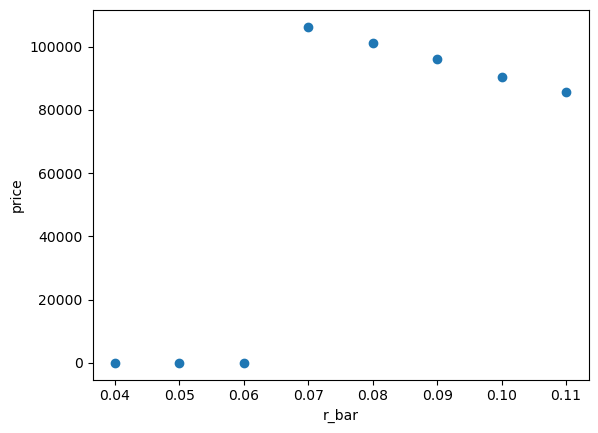

In [11]:
mbs_price = [0, 0, 0, 106240, 101159, 96030.1, 90308.1, 85541.1]
plt.scatter(np.arange(0.04,0.11,0.01), mbs_price)
plt.xlabel('r_bar')
plt.ylabel('price')

* Negative Correlation: Contrary to the initial interpretation, the trend generally indicates that as the average rate r_bar increases, the price of the MBS decreases. This is expected as higher interest rates typically reduce the present value of future cash flows from MBS, thereby lowering their market price.
* Handling NaN Values, NaN at the Start: The occurrence of NaN values at the start could suggest missing or uncalculable values for MBS prices when r_bar is very low (0.04). This might be due to insufficient data, extreme values, or errors in the underlying calculation model. It's important for financial modeling to address these gaps either by revising the input assumptions or improving the data quality.